Answers to questions:
Much of the data is how we would expect for PyBer these are the thee observable trends I noticed:
One) Generally, the larger the city, results in the more drivers. 
Two) Also, the map of the drives is similar to what we would expect. Urban appears to have shorter commutes(based on average fair), but more drives. and Rural has larger commutes but fewer drivers. So overall with more riders per city, which represents larger cities, we see smaller faires. 
Three) we see with more drivers, overall fair goes down per ride. 
Overall, I think we need to create some machine learning programs that can constantly interpret the incoming data for riders and drivers, and adjust fare prices on a per-location basis. this can entice more drivers where we need it, and drive more profit from our riders. 


In [128]:
%matplotlib inline

#import our libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#load in the data
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

#look at city Data
city_data.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [129]:
#look at Ride Data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
#find average fare on a percity basis. 
ride_data_city = ride_data.groupby(["city"])
ride_average_fair = ride_data_city.mean()
ride_average_fair = ride_average_fair.drop(columns = ["ride_id"])
ride_average_fair = ride_average_fair.rename(columns = {"fare":"Average Fare"})
# ride_average_fair now gives us a chart with city vs average fare 
                                             

In [5]:
#find total number of rides per city 
total_rides_per_city = ride_data_city.count()
total_rides_per_city = total_rides_per_city.drop(columns = ["fare","ride_id"])
total_rides_per_city = total_rides_per_city.rename(columns = {"date":"Total Number of Rides Per City"})
# total_rides_per_city now gives a chart of city vs total number of rides per city


In [17]:
#combine the charts. 
plot_data = pd.merge(total_rides_per_city,ride_average_fair, on = "city")
plot_data = pd.merge(plot_data,city_data, on = "city")
plot_data.head()

,city,Total Number of Rides Per City,Average Fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


In [23]:
#seperate the data
x= dict(tuple(plot_data.groupby("type")))
# create 3 unique lotys
plot_data_urban = x["Urban"]
plot_data_suburban = x["Suburban"]
plot_data_rural = x["Rural"]

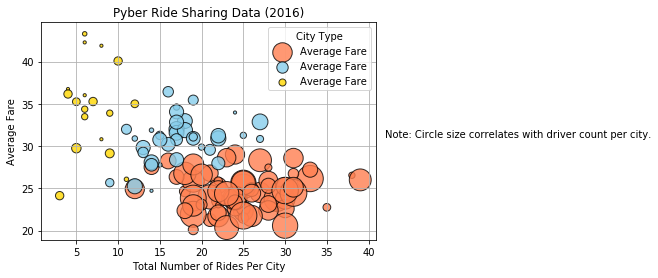

In [127]:
##not well formatted enotugh
#put the bubles down

plt.scatter(plot_data_urban["Total Number of Rides Per City"],plot_data_urban["Average Fare"],
            s = plot_data_urban["driver_count"]*10, alpha=.8, edgecolor = "black", color = "Coral",  )
plt.scatter(plot_data_suburban["Total Number of Rides Per City"],plot_data_suburban["Average Fare"],
            s = plot_data_suburban["driver_count"]*10, alpha=.8, edgecolor = "black", color = "SkyBlue" )
plt.scatter(plot_data_rural["Total Number of Rides Per City"],plot_data_rural["Average Fare"],
            s = plot_data_rural["driver_count"]*10, alpha=.8, edgecolor = "black", color = "Gold" )

#label the axis
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare")
#put in a grid
plt.grid(True)
# put on a title
plt.title("Pyber Ride Sharing Data (2016)")
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10, title = "City Type")
plt.text(42,31,"Note: Circle size correlates with driver count per city.")
plt.show()

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()


In [8]:
#create the pie chart for 
#create data for total rides per city type
city_type = plot_data.groupby(["type"])
city_type_sum= city_type.sum() # this gets us total number of Rides per city and total 


In [9]:
#Find Fares
#find some of faires per city
ride_fair_city = ride_data_city.sum()
#get ride fair per type
ride_fair_city = pd.merge(ride_fair_city,city_data, on = "city")
ride_fair_city = ride_fair_city.groupby(["type"])
ride_fair_city_sum = ride_fair_city.sum()
ride_fair_city_sum # this gives us total far per type 
#ride_fair_city_sum["type"]
ride_fair_city_sum = pd.merge(ride_fair_city_sum,city_type_sum, on = "type")
ride_fair_city_sum.iloc[[0,1,2]].index.tolist()# becouse i'm bad at formating the gives our list of cties. 
ride_fair_city_sum



,fare,ride_id,driver_count_x,Total Number of Rides Per City,Average Fare,driver_count_y
type,,,,,,
Rural,4327.93,580968240341287,78,125,623.479771,78
Suburban,19356.33,3106884522576766,490,625,1106.542729,490
Urban,39854.38,7919412664056093,2405,1625,1616.942033,2405


Text(0.5, 1.0, 'Fares Per City Type')

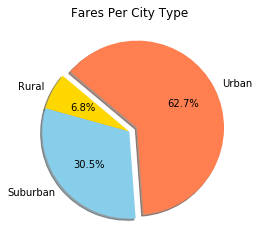

In [117]:
#make pie chart for fares per city type
plt.pie(ride_fair_city_sum["fare"], labels = ride_fair_city_sum.iloc[[0,1,2]].index.tolist(), autopct="%1.1f%%", 
        startangle =140, shadow = True,explode =  (0,0,0.1), colors = ["Gold","SkyBlue","Coral"])
plt.title("Fares Per City Type")

Text(0.5, 1.0, 'Rides Per City Type ')

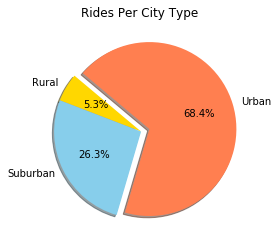

In [109]:
#total rides per city type 
plt.pie(ride_fair_city_sum["Total Number of Rides Per City"], labels = ride_fair_city_sum.iloc[[0,1,2]].index.tolist(), autopct="%1.1f%%", 
        startangle =140, shadow = True,explode =  (0,0,0.1), colors = ["Gold","SkyBlue","Coral"])
plt.title("Rides Per City Type ")

Text(0.5, 1.0, 'Drives Per City Type')

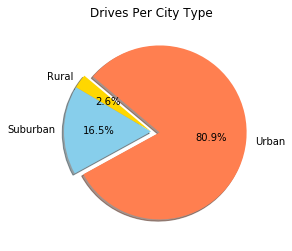

In [110]:
#Total Drives Per City Type
plt.pie(ride_fair_city_sum["driver_count_x"], labels = ride_fair_city_sum.iloc[[0,1,2]].index.tolist(), autopct="%1.1f%%", 
        startangle =140, shadow = True ,explode =  (0,0,0.1), colors = ["Gold","SkyBlue","Coral"],)
plt.title("Drives Per City Type")